In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
from supportFunctions import *

In [48]:
#plot hypertension vs five air pollutants

#load data

numpatients = pd.read_csv('data/numpatients_by_disease.csv',  header=[0], index_col=[0])
directory = "data/air_data"
df_dict = loadFiles(directory)
len(df_dict.keys())

cleaned!
added no2 to df_dict
cleaned!
added ozone to df_dict
cleaned!
added co to df_dict
cleaned!
added pm10 to df_dict
cleaned!
added sox to df_dict


5

In [49]:
numpatients.head()
disease_codes = numpatients.columns
hypertension = numpatients.iloc[:, 0]

In [50]:
#clean air data some more
for title, df in df_dict.items(): 
    print(title)
    time = df.iloc[:, 0].to_list()
    #set y-month as index
    df = df.set_index(pd.Series(time))
    #drop previous indices
    df = df.iloc[:, 1:].astype('float64')
    str_entries = df.select_dtypes(include='object')
    #print(df.head())
    df_dict[title] = df

      # 'object' includes strings in Pandas

no2
ozone
co
pm10
sox


In [51]:
df_dict['no2'].head()
time

[2017.01,
 2017.02,
 2017.03,
 2017.04,
 2017.05,
 2017.06,
 2017.07,
 2017.08,
 2017.09,
 2017.1,
 2017.11,
 2017.12,
 2018.01,
 2018.02,
 2018.03,
 2018.04,
 2018.05,
 2018.06,
 2018.07,
 2018.08,
 2018.09,
 2018.1,
 2018.11,
 2018.12,
 2019.01,
 2019.02,
 2019.03,
 2019.04,
 2019.05,
 2019.06,
 2019.07,
 2019.08,
 2019.09,
 2019.1,
 2019.11,
 2019.12,
 2020.01,
 2020.02,
 2020.03,
 2020.04,
 2020.05,
 2020.06,
 2020.07,
 2020.08,
 2020.09,
 2020.1,
 2020.11,
 2020.12,
 2021.01,
 2021.02,
 2021.03,
 2021.04,
 2021.05,
 2021.06,
 2021.07,
 2021.08,
 2021.09,
 2021.1,
 2021.11,
 2021.12,
 2022.01,
 2022.02,
 2022.03,
 2022.04,
 2022.05,
 2022.06,
 2022.07,
 2022.08,
 2022.09,
 2022.1,
 2022.11,
 2022.12]

-0.01329942518980663


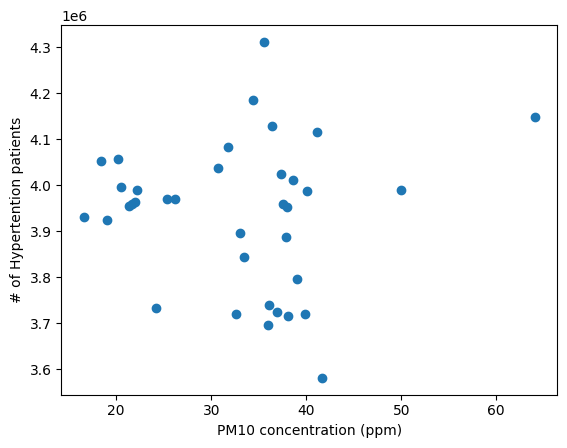

In [10]:
#pm vs hypertension @ seoul

pollutants = df_dict.keys()
pm10 = df_dict['pm10'].astype('float64').mean(axis=1)[2020.01:]
pm10

plt.scatter(pm10, hypertension)
plt.xlabel("PM10 concentration (ppm)")
plt.ylabel("# of Hypertention patients")
c = pm10.corr(hypertension)
print(c)

-0.03712813975066269
0.015174678239774387
-0.12121033845761482
-0.01329942518980663
-0.3089821517606551


Text(0, 0.5, '# of Hypertension patients')

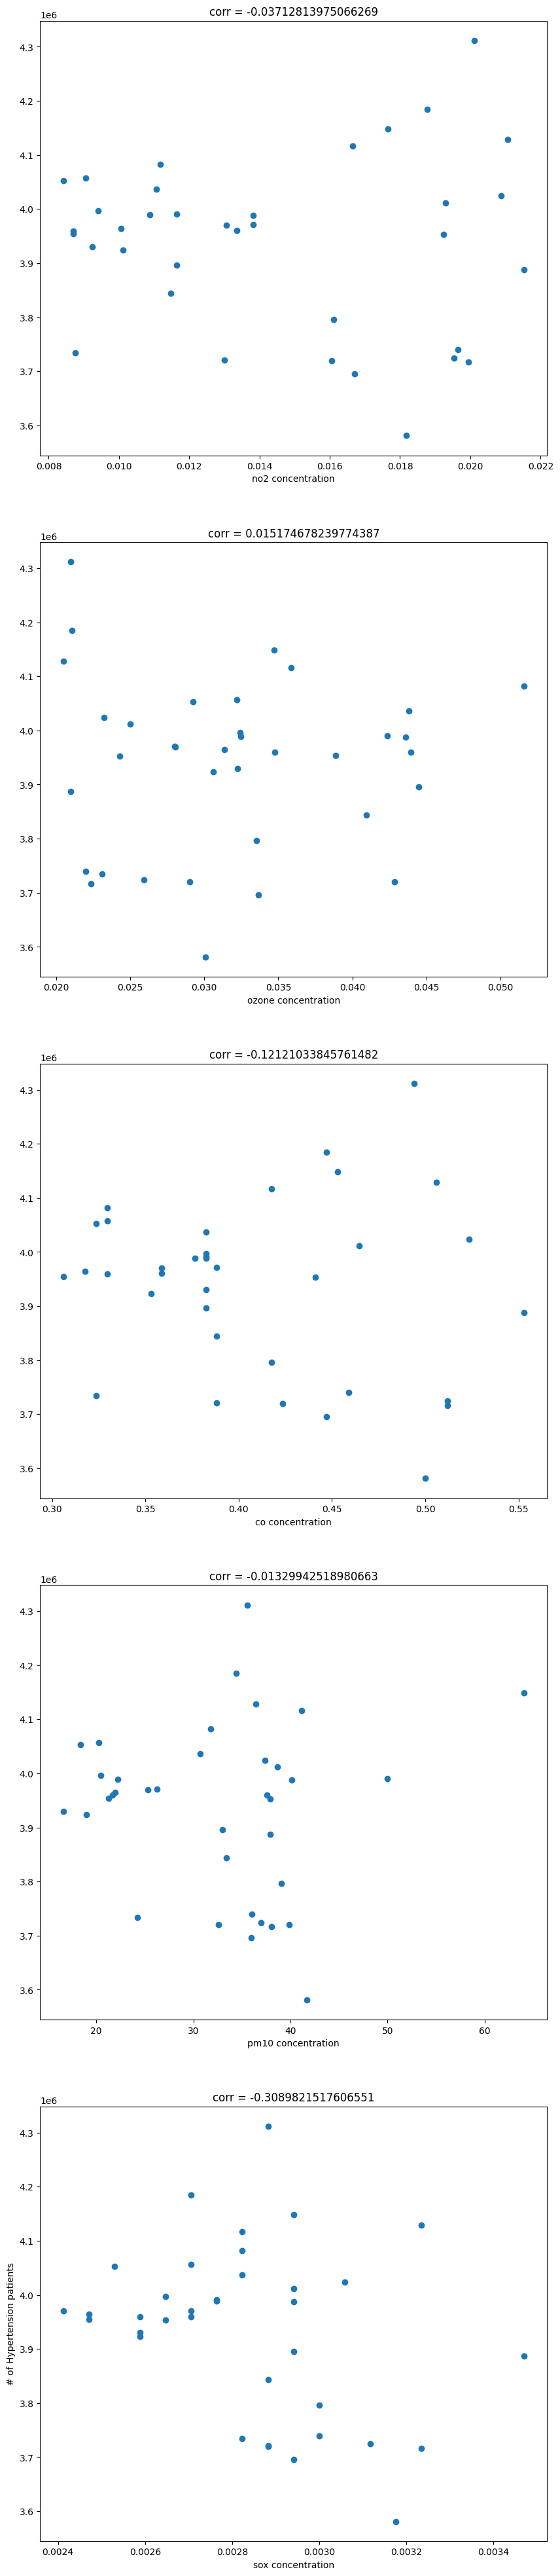

In [11]:

fig, axs = plt.subplots(nrows=len(pollutants), ncols = 1, figsize=(10, 10*len(pollutants)))
for idx, pollutant in enumerate(pollutants):
    poll = df_dict[pollutant].astype('float64').mean(axis=1)[2020.01:]
    axs[idx].scatter(poll, hypertension)
    axs[idx].set_xlabel(pollutant+" concentration")
    c = poll.corr(hypertension)
    axs[idx].set_title("corr = "+str(c))
    print(c)
plt.ylabel("# of Hypertension patients")

    


In [12]:
from scipy.stats.stats import pearsonr   

/var/folders/lq/dt070ydd3h13pqgrgy6rpv300000gn/T/ipykernel_879/3318344175.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.2747708446363106, pvalue=0.10483936575773012)
PearsonRResult(statistic=-0.244274026813612, pvalue=0.15106661685418882)
PearsonRResult(statistic=0.24522775442787573, pvalue=0.14942725741289034)
PearsonRResult(statistic=0.13338499623981862, pvalue=0.4380202490946268)
PearsonRResult(statistic=0.11550637233922673, pvalue=0.5023284920581808)


Text(0, 0.5, '# of  patients')

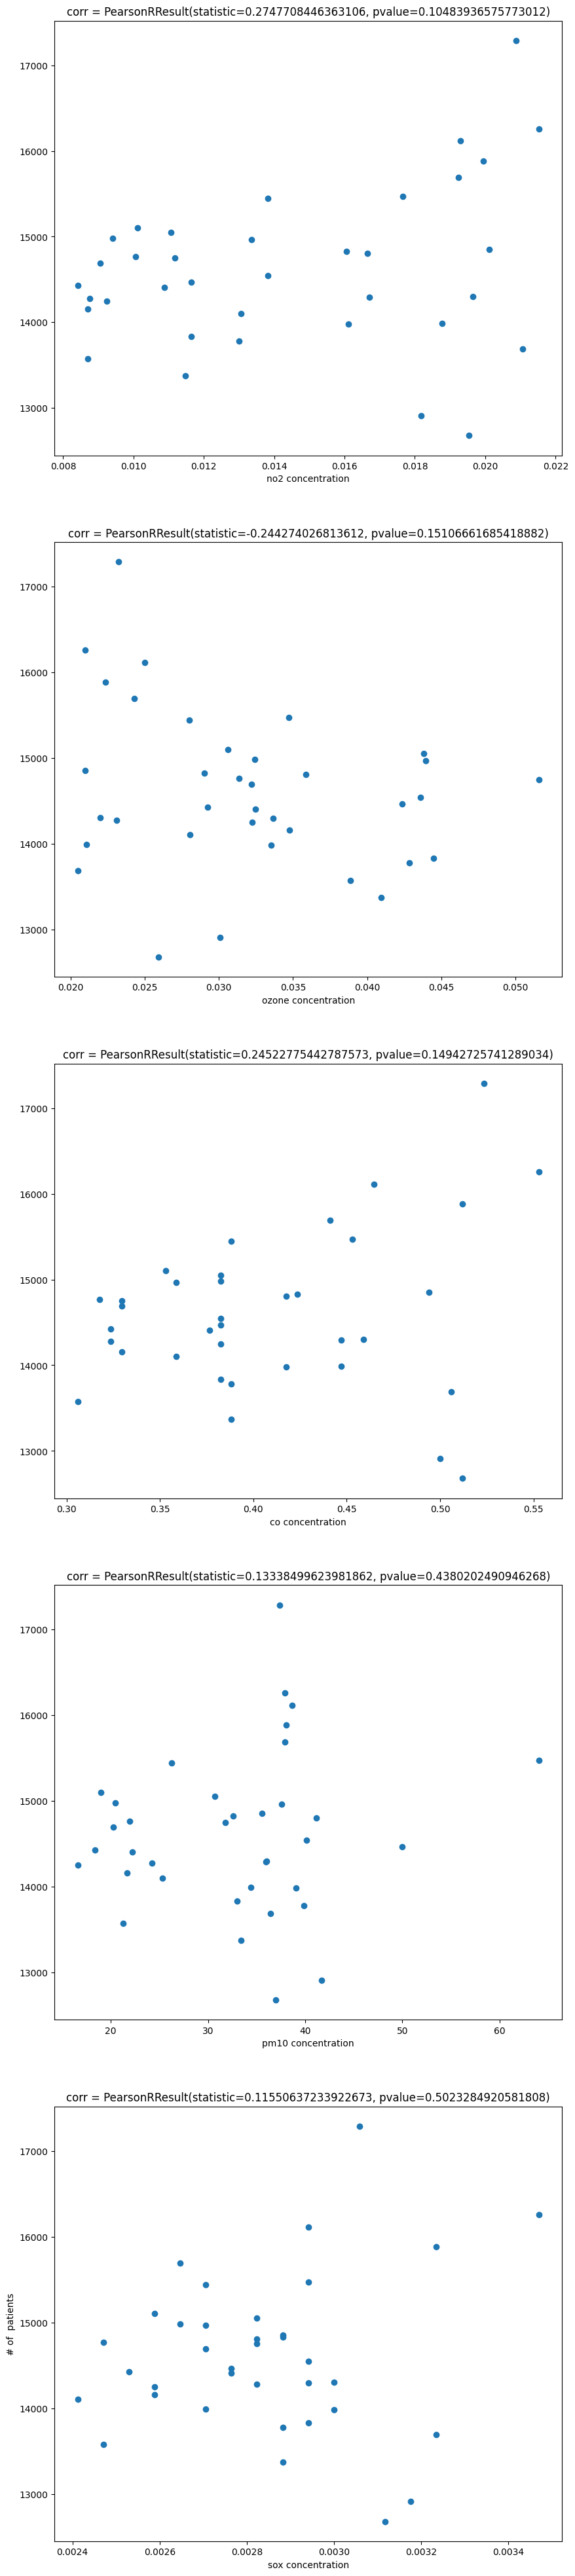

In [14]:


fig, axs = plt.subplots(nrows=len(pollutants), ncols = 1, figsize=(10, 10*len(pollutants)))
for idx, pollutant in enumerate(pollutants):
    
    poll = df_dict[pollutant].astype('float64').mean(axis=1)[2020.01:]
    axs[idx].scatter(poll, disease2)
    axs[idx].set_xlabel(pollutant+" concentration")
    c = pearsonr(numpa.values, poll.values)
    axs[idx].set_title("corr = "+str(c))
    print(c)
plt.ylabel("# of  patients")

PearsonRResult(statistic=0.5328103078918459, pvalue=0.00082146152860048) I693 sox
PearsonRResult(statistic=0.43449306390294584, pvalue=0.008098724440092447) J180 no2
PearsonRResult(statistic=-0.4024093271866833, pvalue=0.014970079462115066) J180 ozone
PearsonRResult(statistic=0.36817201750843215, pvalue=0.027151965871682157) J180 co
PearsonRResult(statistic=0.7873399432731467, pvalue=1.224351262552159e-08) J340 no2
PearsonRResult(statistic=-0.44826018371035153, pvalue=0.0061102166984519386) J340 ozone
PearsonRResult(statistic=0.7184212272515165, pvalue=8.060137376553108e-07) J340 co
PearsonRResult(statistic=0.44632195772419236, pvalue=0.006361837505935759) J340 pm10
PearsonRResult(statistic=0.538817912834336, pvalue=0.0006978661658634485) J340 sox


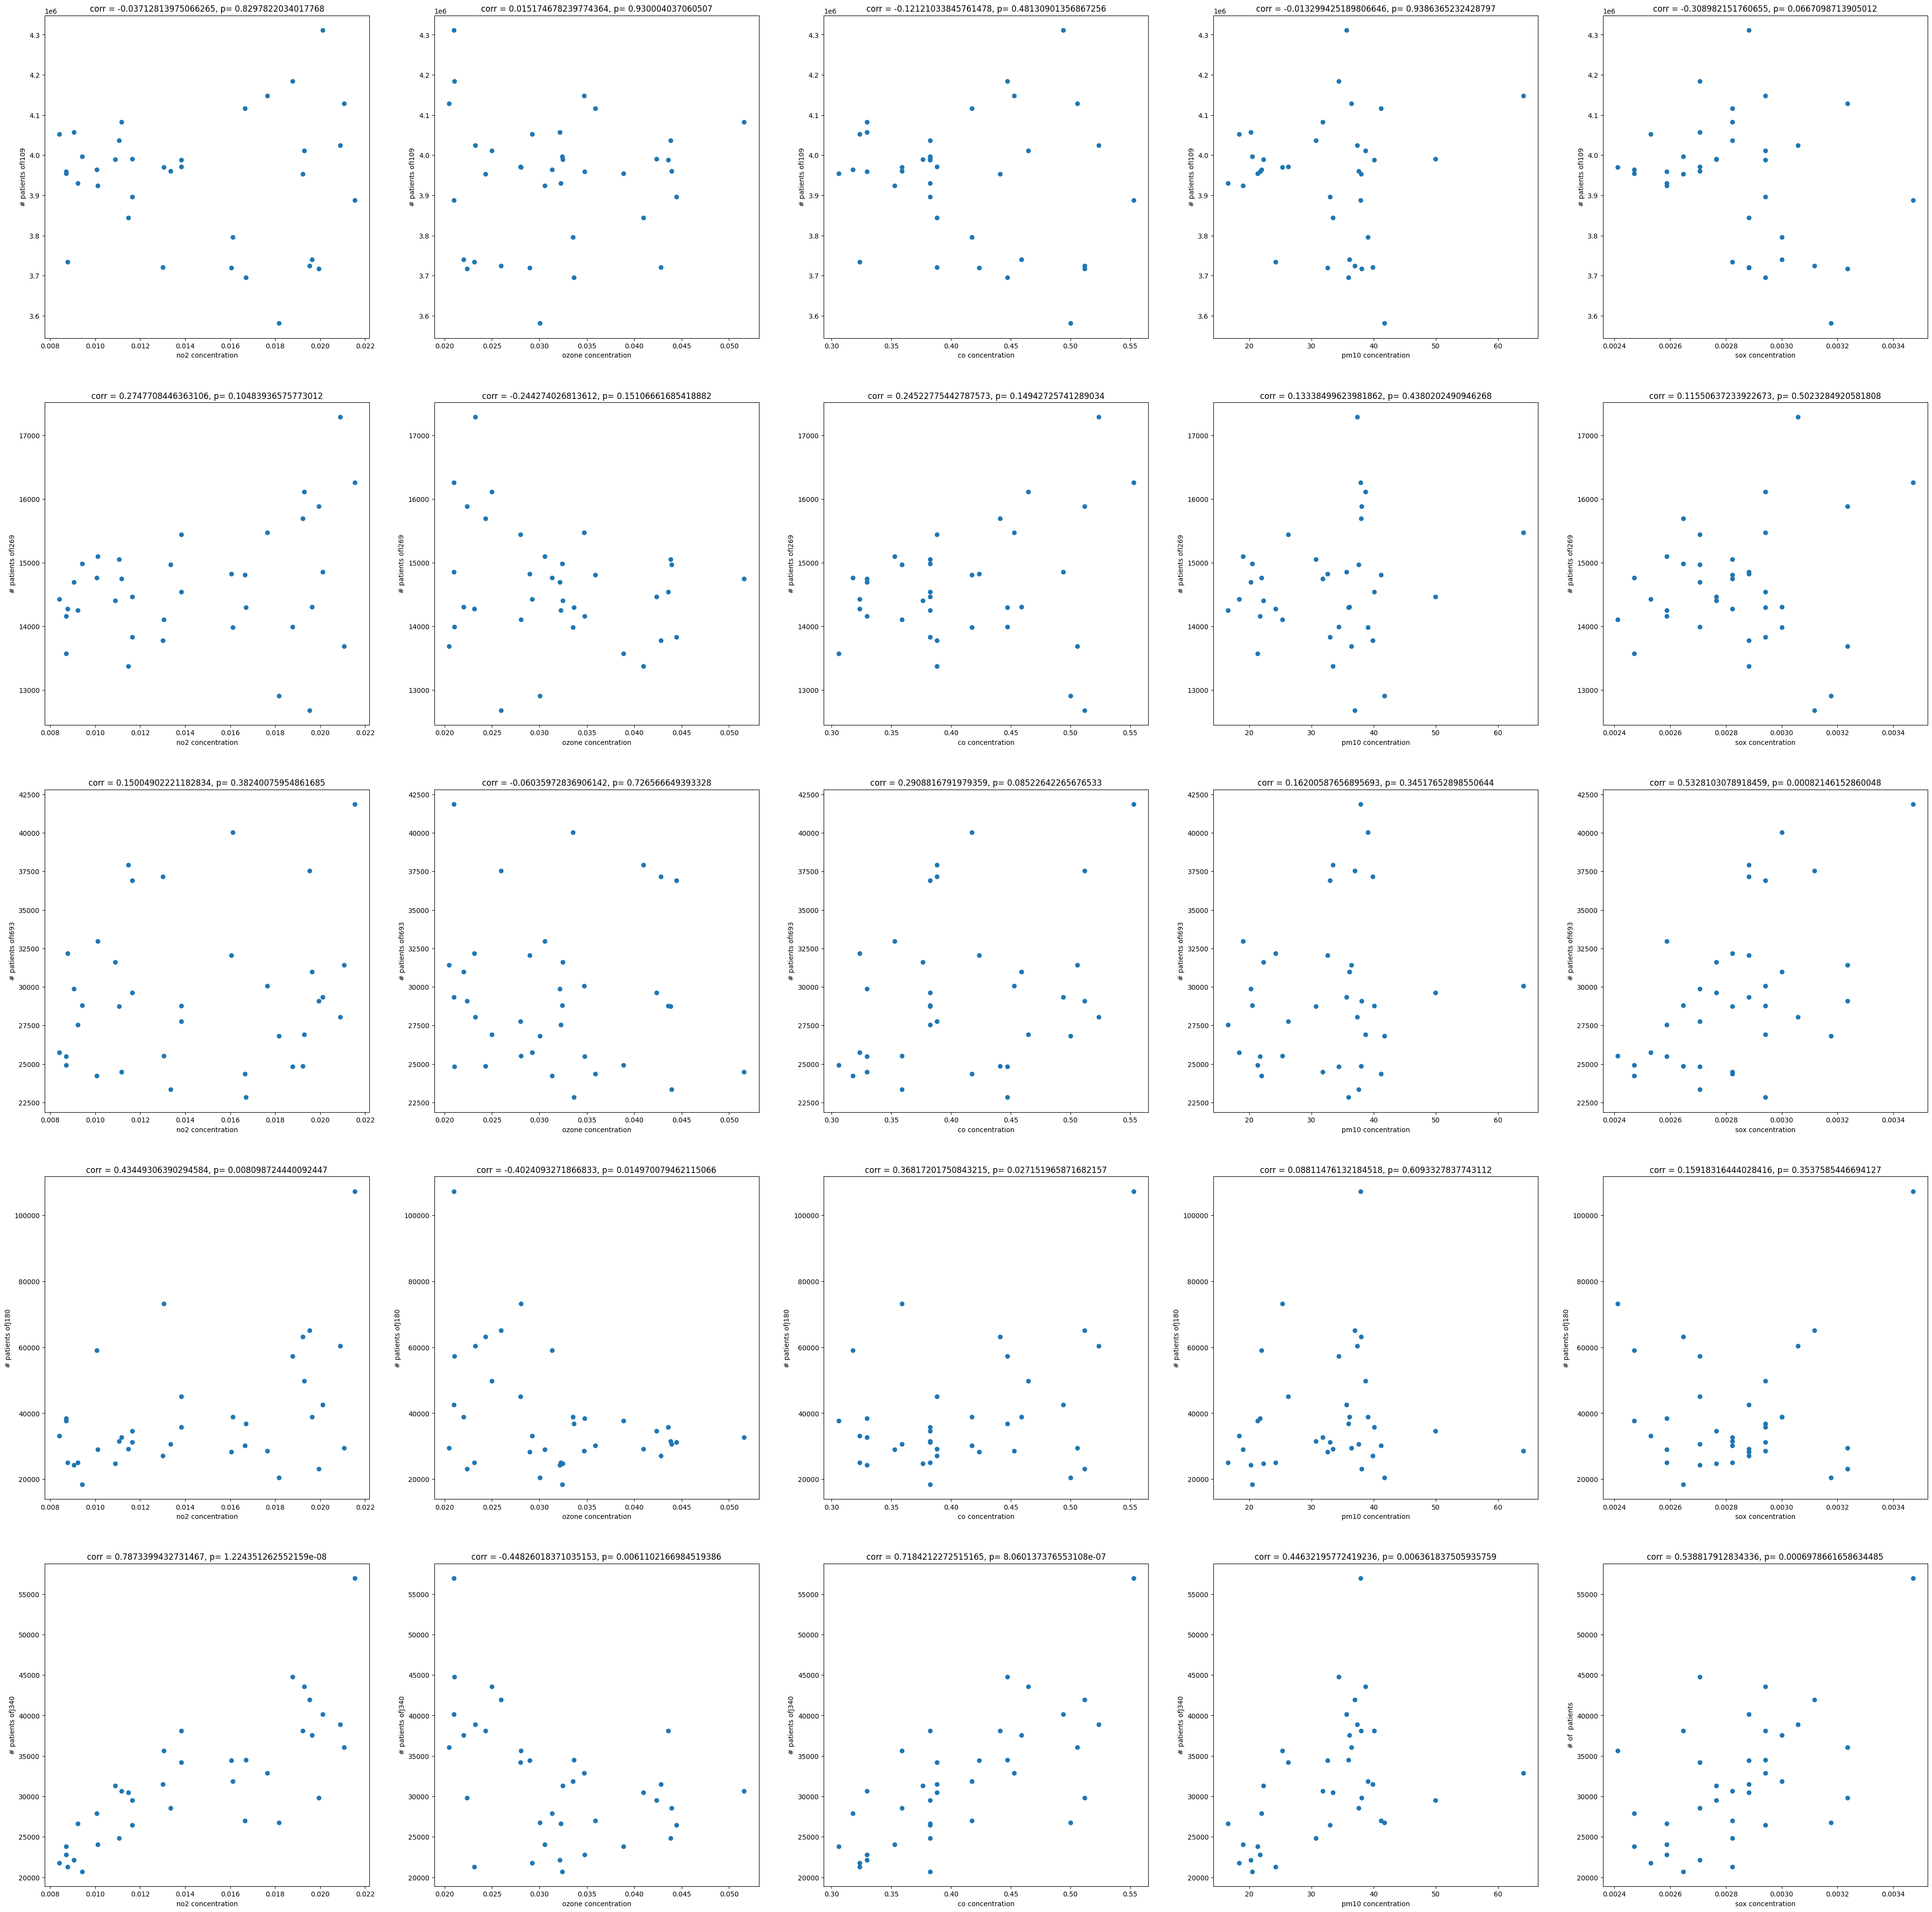

In [53]:
fig, axs = plt.subplots(nrows=len(disease_codes), ncols = len(pollutants), figsize=(10*len(disease_codes), 10*len(pollutants)))
for code_idx, disease in enumerate(disease_codes):
    num_pat = numpatients[disease]
    for pol_idx, pollutant in enumerate(pollutants):
        poll = df_dict[pollutant].astype('float64').mean(axis=1)[2020.01:]
        axs[code_idx][pol_idx].scatter(poll, num_pat)
        axs[code_idx][pol_idx].set_xlabel(pollutant+" concentration")
        axs[code_idx][pol_idx].set_ylabel("# patients of"+ disease)
        c = pearsonr(num_pat.values, poll.values)
        axs[code_idx][pol_idx].set_title("corr = "+str(c.statistic) + ", p= " + str(c.pvalue))

        if c.pvalue < 0.05:
            print(c, disease, pollutant)
    plt.ylabel("# of  patients")

In [54]:
#breakdown by region. try seoul?

df = pd.read_csv('data/num_patients.csv', header=[0], index_col=[0])
df.head()
df.columns

Index(['Total J411', 'Seoul J411', 'Busan J411', 'Incheon J411', 'Daegu J411',
       'Gwangju J411', 'Daejeon J411', 'Ulsan J411', 'Gyeonggi J411',
       'Gangwon J411',
       ...
       'Gyeonggi I269', 'Gangwon I269', 'Choongbuk I269', 'Choongnam I269',
       'Jeonbuk I269', 'Jeonnam I269', 'Gyeongbuk I269', 'Gyeongnam I269',
       'Jeju I269', 'Sejong I269'],
      dtype='object', length=108)

In [55]:
#filter columns that have seoul in it

seoul_cols = [col for col in df.columns if 'Seoul' in col]
seoul_df = df[seoul_cols]
print(seoul_cols)


names = seoul_df.columns.to_list()

seoul_df.columns = list(map(lambda x: x.replace("Seoul ", ""), names))

seoul_df.head()


['Seoul J411', 'Seoul J180', 'Seoul I693', 'Seoul I109', 'Seoul J340', 'Seoul I269']


,J411,J180,I693,I109,J340,I269
2020.01,2699,7435,656,570255,9135,1135
2020.02,1706,4353,617,549626,6352,985
2020.03,1250,2455,582,560586,4687,1048
2020.04,978,1569,580,550439,4500,1114
2020.05,975,1442,629,564718,4390,1068


PearsonRResult(statistic=0.41202681406436975, pvalue=0.012526825667426241) J180 no2
PearsonRResult(statistic=-0.37504154546983925, pvalue=0.024208140750959777) J180 ozone
PearsonRResult(statistic=0.42975050584582764, pvalue=0.008901060174645543) J180 co
PearsonRResult(statistic=0.6879211709712991, pvalue=3.5512513643396894e-06) J340 no2
PearsonRResult(statistic=-0.5495125120204917, pvalue=0.000518077126132649) J340 ozone
PearsonRResult(statistic=0.7193102559427846, pvalue=7.697123286788838e-07) J340 co
PearsonRResult(statistic=0.37741586534096505, pvalue=0.02325425397685431) J340 pm10
PearsonRResult(statistic=0.460833181097176, pvalue=0.004676461982117008) J340 sox


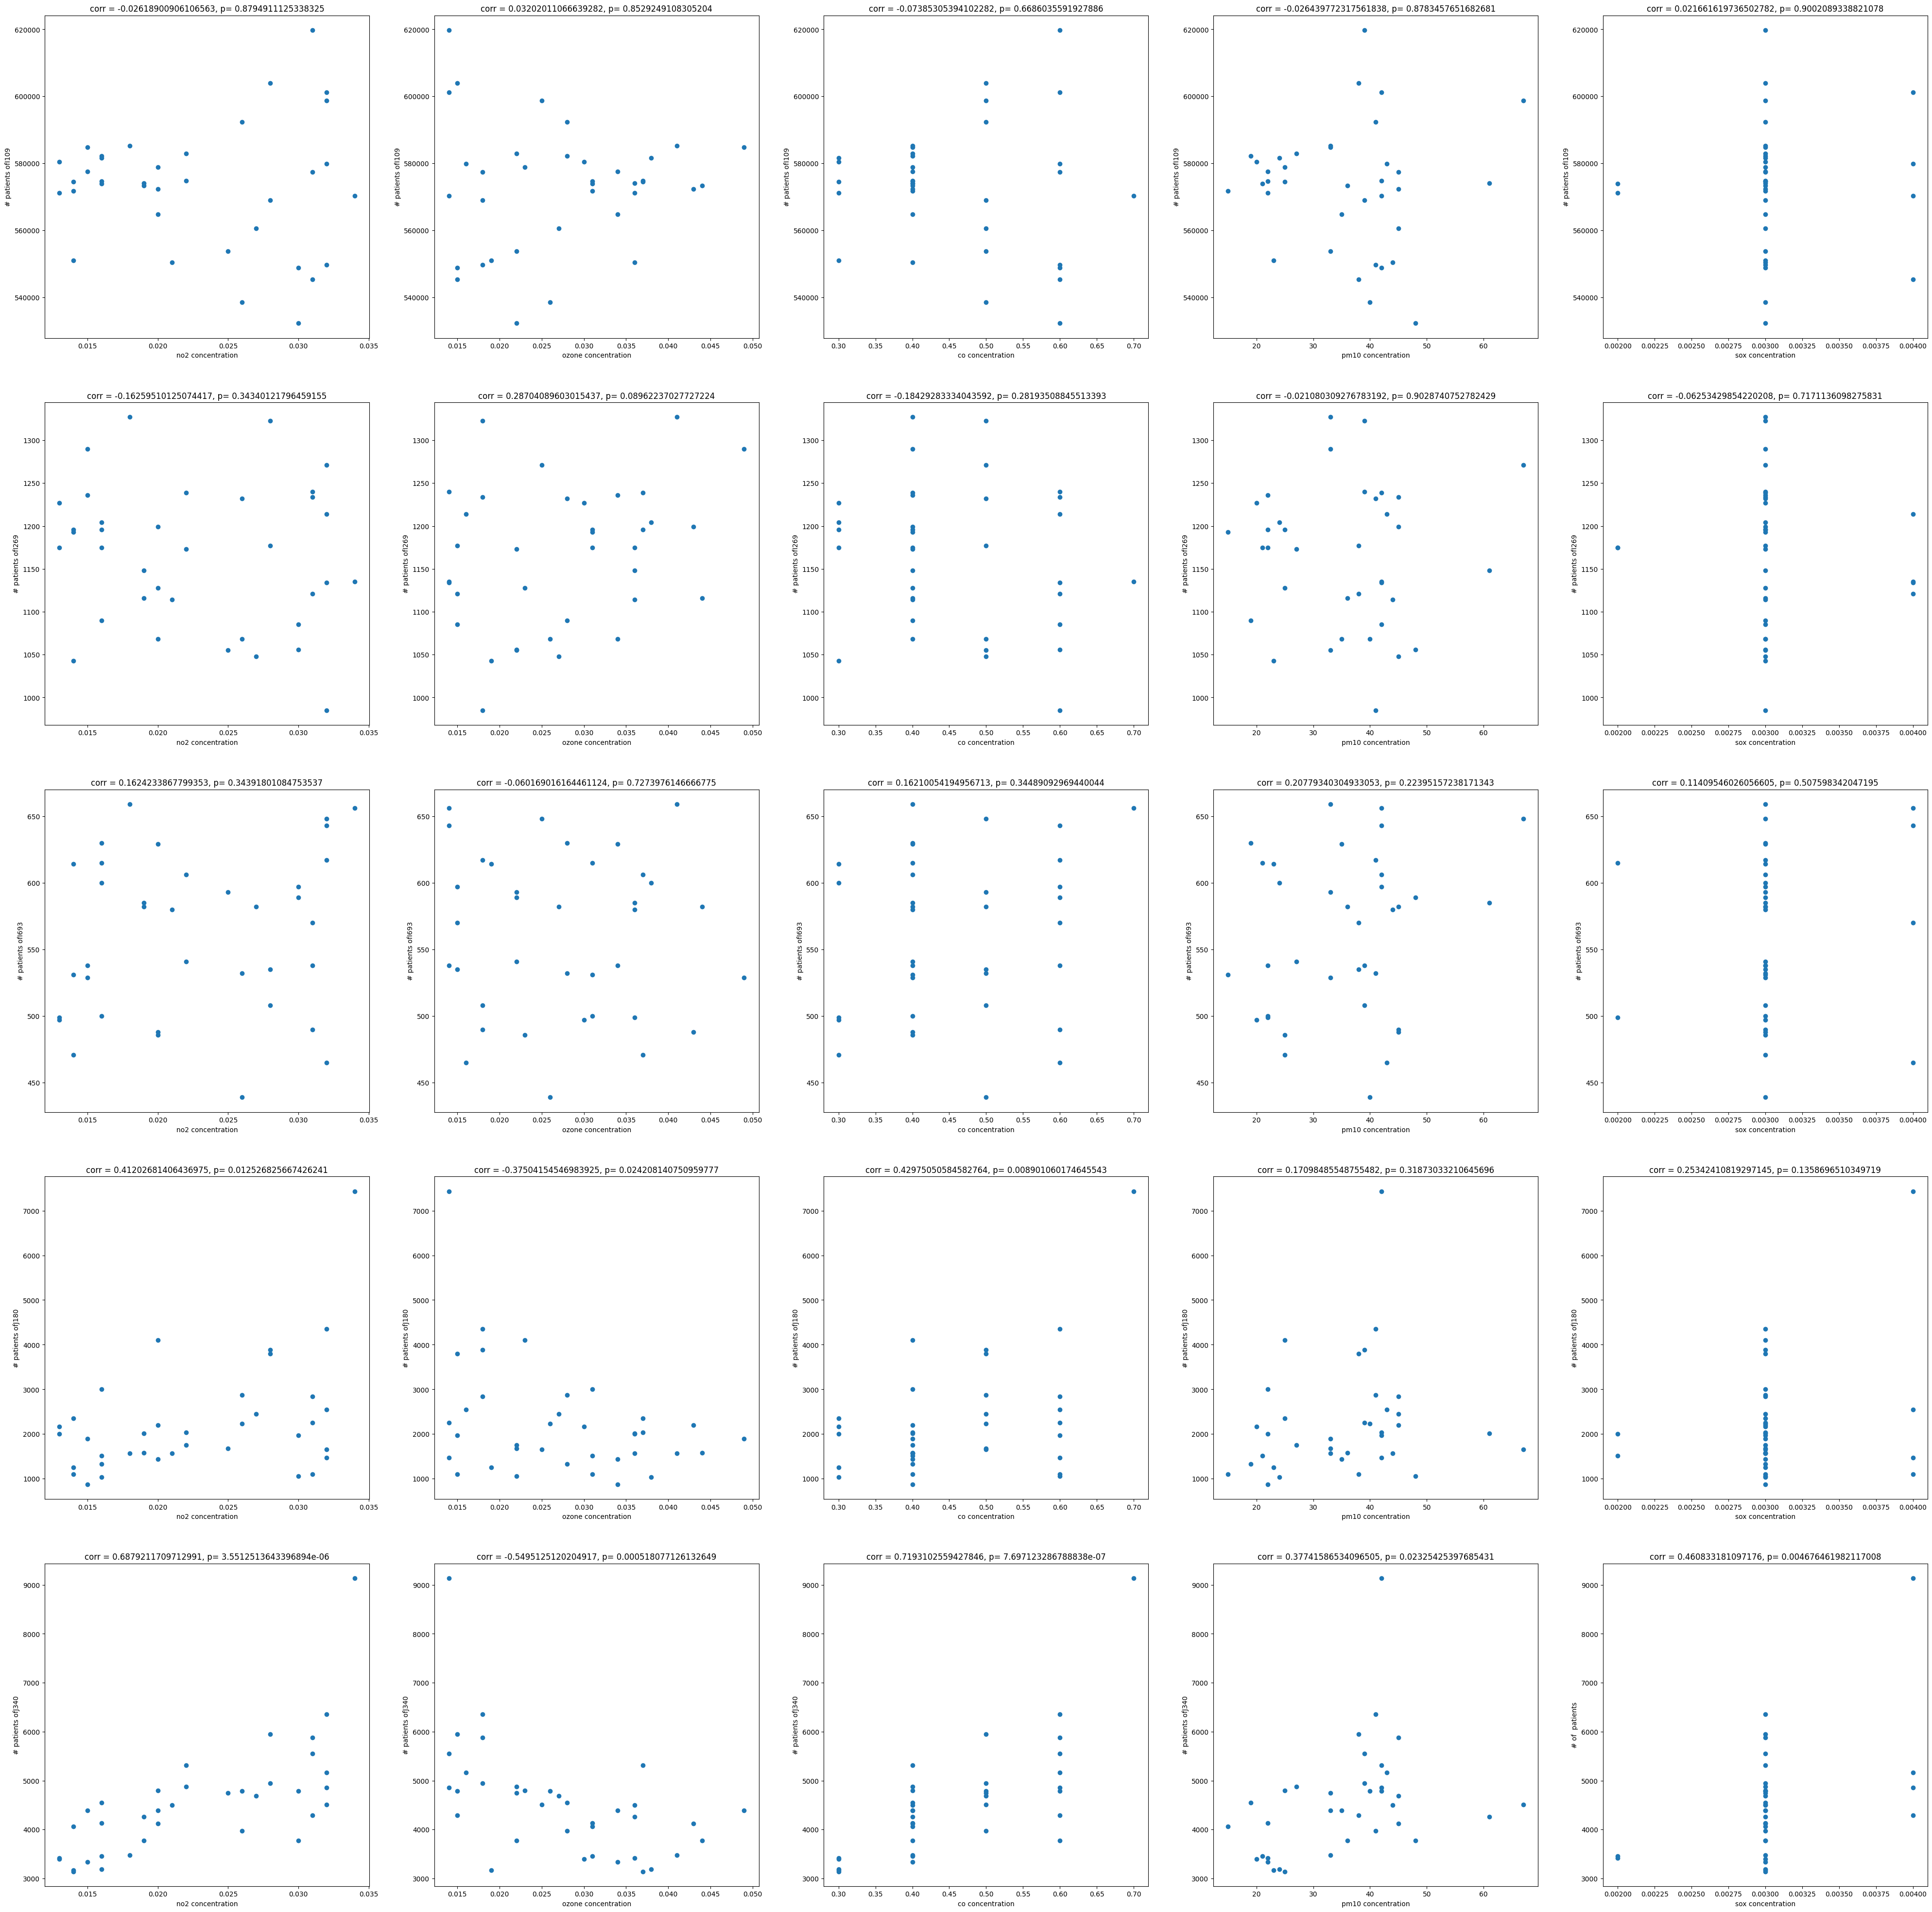

In [57]:
fig, axs = plt.subplots(nrows=len(disease_codes), ncols = len(pollutants), figsize=(10*len(disease_codes), 10*len(pollutants)))
for code_idx, disease in enumerate(disease_codes):
    num_pat = seoul_df[disease]
    for pol_idx, pollutant in enumerate(pollutants):
        poll = df_dict[pollutant].astype('float64')['Seoul'][2020.01:]
        axs[code_idx][pol_idx].scatter(poll, num_pat)
        axs[code_idx][pol_idx].set_xlabel(pollutant+" concentration")
        axs[code_idx][pol_idx].set_ylabel("# patients of"+ disease)
        c = pearsonr(num_pat.values, poll.values)
        axs[code_idx][pol_idx].set_title("corr = "+str(c.statistic) + ", p= " + str(c.pvalue))

        if c.pvalue < 0.05:
            print(c, disease, pollutant)
    plt.ylabel("# of  patients")

In [ ]:
#try metro areas like incheon and busan. 
#try non-metro areas and see how it compares

# we know that correlation does not necessarily mean causality. but if we repeat this in cities in different countries it might strengthen our claim?

#in fact NYC paper says ozone is negatively correlated w/ asthma (which is a respiratory disease) and we got negative correlations out of ozone too
# try los angeles and do the same thing

# or try los angeles but with more granular dataset that enables geocoding (-> use kriging to guesstimate polllution metrics in areas that lack measurements)